In [1]:
##PROBLEM STATEMENT 

##capturing the total scorr based on the students other attributes/features


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
##reading the dataset
dataset = pd.read_csv(r'C:\Users\moham\Desktop\Student_Perf_Proj_DS\notebook\data\StudentsPerformance (1).csv')



In [5]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
##cheking the duplicate values
dataset.duplicated().sum()

0

In [7]:
##checking the missing values
dataset.isnull().sum()*100
#3no mssing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
## checking the object and numeric columns in the dataset
for cols in dataset.columns:
    if dataset[cols].dtype == 'object':
        print(f"the object type cols are : {cols}")
        
    elif dataset[cols].dtype != object and dataset[cols].dtype == 'int64':
        print(f'the numeric/float type cols are :{cols}')
    

the object type cols are : gender
the object type cols are : race/ethnicity
the object type cols are : parental level of education
the object type cols are : lunch
the object type cols are : test preparation course
the numeric/float type cols are :math score
the numeric/float type cols are :reading score
the numeric/float type cols are :writing score


In [21]:
for cols in dataset:
    if dataset[cols].dtype == 'object':
        print(cols,":", dataset[cols].unique())
        print("********")

gender : ['female' 'male']
********
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
********
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
********
lunch : ['standard' 'free/reduced']
********
test preparation course : ['none' 'completed']
********


In [20]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
dataset['total_score'] = dataset['math score'] + dataset['reading score'] +dataset['writing score']

In [24]:
dataset['average_score'] = dataset['math score'] + dataset['reading score'] +dataset['writing score']/3

In [26]:
dataset.drop(columns=['math score' ,'reading score','writing score'],axis=1,inplace=True)

In [27]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total_score,average_score
0,female,group B,bachelor's degree,standard,none,218,168.666667
1,female,group C,some college,standard,completed,247,188.333333
2,female,group B,master's degree,standard,none,278,216.000000
3,male,group A,associate's degree,free/reduced,none,148,118.666667
4,male,group C,some college,standard,none,229,179.000000


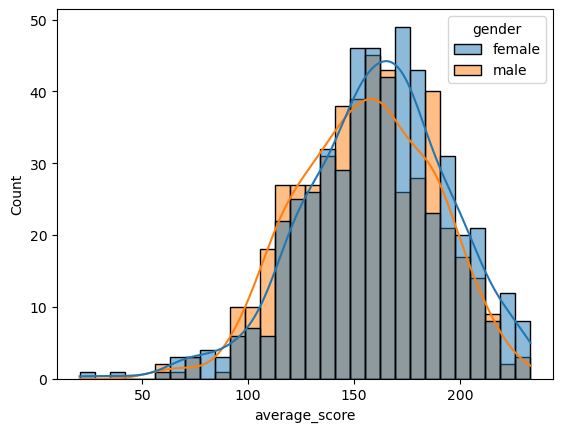

In [29]:
sns.histplot(data=dataset , x='average_score',hue='gender',bins =30,kde=True)
plt.show()

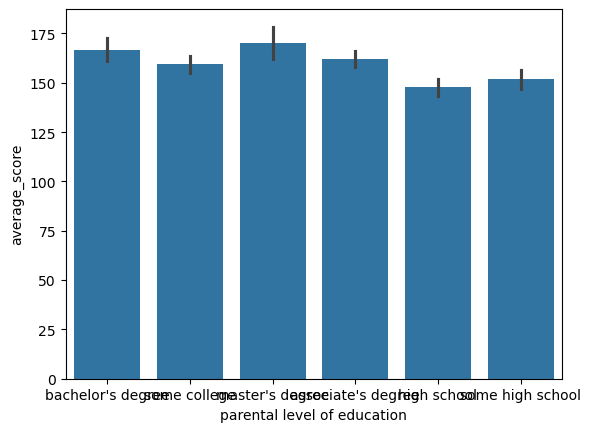

In [31]:
sns.barplot(data=dataset , x = 'parental level of education' ,  y='average_score')
plt.show()

In [32]:
dataset.shape

(1000, 7)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [36]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total_score,average_score
0,female,group B,bachelor's degree,standard,none,218,168.666667
1,female,group C,some college,standard,completed,247,188.333333
2,female,group B,master's degree,standard,none,278,216.000000
3,male,group A,associate's degree,free/reduced,none,148,118.666667
4,male,group C,some college,standard,none,229,179.000000


In [37]:
x_indep = dataset.drop(columns=['total_score'],axis=1)

In [38]:
y_dep  = dataset['total_score']

In [42]:
y_dep

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [40]:
##
numer_fts = x_indep.select_dtypes(exclude='object').columns
numer_fts

Index(['average_score'], dtype='object')

In [41]:
#
categ_fts = x_indep.select_dtypes(include='object').columns
categ_fts

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [44]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer



In [45]:
encoder = OneHotEncoder()
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    [("one_hoe_encoder", encoder , categ_fts),
     ("standardisation" , scaler , numer_fts)]
)

In [46]:
x_indep = preprocessor.fit_transform(x_indep)

In [47]:
x_indep

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.32420732],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.9187688 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.7551858 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.18973565],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.41490314],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.01954193]])

In [48]:
x_indep.shape

(1000, 18)

In [49]:
## 
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test = train_test_split(x_indep , y_dep ,test_size=0.2,random_state=42)

In [61]:
def evaluate_models(actual,predicted):
    mae = mean_absolute_error(actual , predicted)
    mse = mean_squared_error(actual,predicted)
    r2_scores = r2_score(actual,predicted)
    return mae,mse ,r2_scores


In [70]:
models = {
    "dtree" : DecisionTreeRegressor(),
    "Randomforest": RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    #'knn':KNeighborsRegressor(),
    'linear_reg': LinearRegression(),
    'XGBRegressor':XGBRegressor()
}
models_lst=[]
r2_scores = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)

    train_mae , train_mse,train_r2 = evaluate_models(y_train , y_train_pred)

    test_mae , test_mse , test_r2 = evaluate_models(y_test , y_test_pred)

    models_lst.append(list(models.keys())[i])
    r2_scores.append(test_r2)
    
print(r2_scores)

[0.9904887738764819, 0.9918803136013948, 0.988684486283794, 0.9973018454888019, 0.9800353948325127]


In [71]:
res = pd.DataFrame(list(zip(models_lst , r2_scores)))
res

,0,1
0,dtree,0.990489
1,Randomforest,0.991880
2,AdaBoostRegressor,0.988684
3,linear_reg,0.997302
4,XGBRegressor,0.980035
